In [1]:
import sys
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython 
import sklearn
from sklearn.model_selection import train_test_split

import warnings
#warnings.filterwarnings("ignore")

# 2.4 uncertainty estimator

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=.25, factor=.5, random_state=1)

#change the class names to "blue" and "red"
y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test,  = \
    train_test_split(X, y_named, y, random_state=0)

# gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

## 2.4.1 decision function

In [3]:
print("X_test.shape: ", X_test.shape)
print("the result shape of decision function:", gbrt.decision_function(X_test).shape)

X_test.shape:  (25, 2)
the result shape of decision function: (25,)


In [4]:
print("decision function: ", gbrt.decision_function(X_test)[:6])

decision function:  [ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [5]:
print("comparision between threshold and the result of decision function: \n",
     gbrt.decision_function(X_test) > 0)
print("prediction: \n", gbrt.predict(X_test))

comparision between threshold and the result of decision function: 
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
prediction: 
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [6]:
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[greater_zero]
print("pred is same as the predict result: ", np.all(pred == gbrt.predict(X_test)))

pred is same as the predict result:  True


In [7]:
decision_function = gbrt.decision_function(X_test)
print("decision function minimum: {:.2f}, maximum: {:.2f}".format(
    np.min(decision_function), np.max(decision_function)))

decision function minimum: -7.69, maximum: 4.29


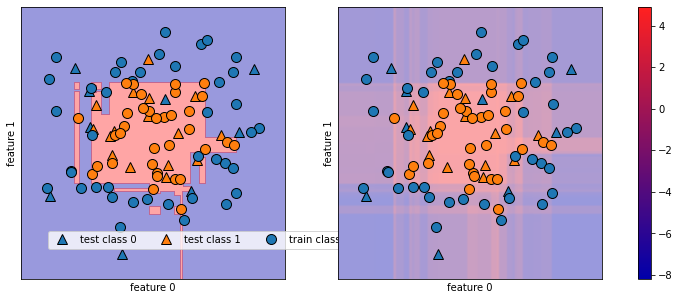

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                               fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], 
                                           alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                            markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                            markers='o', ax=ax)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["test class 0", "test class 1", "train class 0",
               "train class 1"], ncol=4, loc=(.1, .11))

## 2.4.2 predict probability

In [9]:
print("shape of predict_proba:", gbrt.predict_proba(X_test).shape)

shape of predict_proba: (25, 2)


In [10]:
print("predict probability: ", gbrt.predict_proba(X_test))

predict probability:  [[1.57362639e-02 9.84263736e-01]
 [8.45756526e-01 1.54243474e-01]
 [9.81128693e-01 1.88713075e-02]
 [9.74070327e-01 2.59296728e-02]
 [1.35214212e-02 9.86478579e-01]
 [2.50463747e-02 9.74953625e-01]
 [9.99543275e-01 4.56725221e-04]
 [1.61426376e-02 9.83857362e-01]
 [2.48329911e-01 7.51670089e-01]
 [3.20518935e-02 9.67948107e-01]
 [9.98441637e-01 1.55836338e-03]
 [1.35214212e-02 9.86478579e-01]
 [1.98099245e-02 9.80190075e-01]
 [7.68580365e-01 2.31419635e-01]
 [2.50463747e-02 9.74953625e-01]
 [9.84817480e-01 1.51825198e-02]
 [7.73836215e-01 2.26163785e-01]
 [9.80463909e-01 1.95360915e-02]
 [1.73607896e-02 9.82639210e-01]
 [1.61426376e-02 9.83857362e-01]
 [1.61426376e-02 9.83857362e-01]
 [3.41393574e-01 6.58606426e-01]
 [6.30759509e-02 9.36924049e-01]
 [9.34424749e-01 6.55752512e-02]
 [8.66199569e-01 1.33800431e-01]]


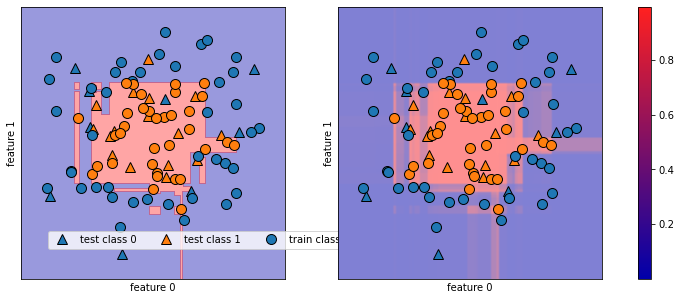

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                            markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                            markers='o', ax=ax)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
# disclose colorbar 
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["test class 0", "test class 1", "train class 0",
               "train class 1"], ncol=4, loc=(.1, .11))


## Uncertainty on multi-classification

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [18]:
print("shape of decision function results: ", gbrt.decision_function(X_test).shape)
print("resutls of decision function: \n", gbrt.decision_function(X_test)[:6, :])

shape of decision function results:  (38, 3)
resutls of decision function: 
 [[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


In [21]:
print("index of the highest decision function:\n", 
     np.argmax(gbrt.decision_function(X_test), axis=1))
print("prediction:\n", gbrt.predict(X_test))

index of the highest decision function:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
prediction:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [20]:
print("predict_proba: \n", gbrt.predict_proba(X_test)[:6])
print("sum: ", gbrt.predict_proba(X_test)[:6].sum(axis=1))

predict_proba: 
 [[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
sum:  [1. 1. 1. 1. 1. 1.]


In [22]:
print("index of the highest predict probability: \n",
     np.argmax(gbrt.predict_proba(X_test), axis=1))
print("prediction:\n", gbrt.predict(X_test))

index of the highest predict probability: 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
prediction:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [24]:
from sklearn.linear_model import LogisticRegression

In [26]:
logreg = LogisticRegression()

named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("classes on train data: ", logreg.classes_)
print("prediction: ", logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("index of the highest decision function:", argmax_dec_func[:10])
print("connect index to classes_: ", logreg.classes_[argmax_dec_func][:10])

classes on train data:  ['setosa' 'versicolor' 'virginica']
prediction:  ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
index of the highest decision function: [1 0 2 1 1 0 1 2 1 1]
connect index to classes_:  ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


/home/hyunjong/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
